# On-ground exploratory data analysis

# PSI

## Read in data from GCP bucket

```
gsutil -m cp -r gs://fdl_space_weather_data .
```

* b - total brightness
* pb - polarised
* raw
* radial - radially filtered ~ for visualisation?

## Untar

In [1]:
import os
import shutil
import pathlib
import glob
from sunpy.map import Map
from sunpy.map.maputils import all_coordinates_from_map
from astropy.coordinates import SkyCoord
#import astropy.io.fits.read as aread
from astropy.io.fits import getdata, getheader
import astropy.units as u
#from astropy import MapMetaValidationError
import numpy as np
from sunpy.visualization.colormaps import cm
from astropy.visualization import AsymmetricPercentileInterval, HistEqStretch, ImageNormalize
import matplotlib.pyplot as plt

In [2]:
!ls PSI_data

synth_4pi_ec19_super_01_all_b_raw.tar
synth_4pi_ec19_super_01_all_b_rfilt.tar
synth_4pi_ec19_super_01_all_pb_raw.tar
synth_4pi_ec19_super_01_all_pb_rfilt.tar


In [12]:
dirname = pathlib.Path("./PSI_data")

for i in os.listdir(dirname):
    print(i)
    shutil.unpack_archive(dirname/i, "PSI_data_ex", "tar")

synth_4pi_ec19_super_01_all_b_raw.tar
synth_4pi_ec19_super_01_all_pb_rfilt.tar
synth_4pi_ec19_super_01_all_pb_raw.tar
synth_4pi_ec19_super_01_all_b_rfilt.tar


In [13]:
!ls PSI_data_ex

b_raw  b_rfilt	pb_raw	pb_rfilt


In [15]:
ls PSI_data_ex/b_raw/synth_4pi_ec19_super_01_all_raw_b_000.fits

PSI_data_ex/b_raw/synth_4pi_ec19_super_01_all_raw_b_000.fits


In [81]:
ls PSI_data_ex/b_raw/

synth_4pi_ec19_super_01_all_raw_b_000.fits
synth_4pi_ec19_super_01_all_raw_b_001.fits
synth_4pi_ec19_super_01_all_raw_b_002.fits
synth_4pi_ec19_super_01_all_raw_b_003.fits
synth_4pi_ec19_super_01_all_raw_b_004.fits
synth_4pi_ec19_super_01_all_raw_b_005.fits
synth_4pi_ec19_super_01_all_raw_b_006.fits
synth_4pi_ec19_super_01_all_raw_b_007.fits
synth_4pi_ec19_super_01_all_raw_b_008.fits
synth_4pi_ec19_super_01_all_raw_b_009.fits
synth_4pi_ec19_super_01_all_raw_b_010.fits
synth_4pi_ec19_super_01_all_raw_b_011.fits
synth_4pi_ec19_super_01_all_raw_b_012.fits
synth_4pi_ec19_super_01_all_raw_b_013.fits
synth_4pi_ec19_super_01_all_raw_b_014.fits
synth_4pi_ec19_super_01_all_raw_b_015.fits
synth_4pi_ec19_super_01_all_raw_b_016.fits
synth_4pi_ec19_super_01_all_raw_b_017.fits
synth_4pi_ec19_super_01_all_raw_b_018.fits
synth_4pi_ec19_super_01_all_raw_b_019.fits
synth_4pi_ec19_super_01_all_raw_b_020.fits
synth_4pi_ec19_super_01_all_raw_b_021.fits
synth_4pi_ec19_super_01_all_raw_b_022.fits
synth_4pi_e

In [22]:
smap = Map("PSI_data_ex/b_raw/synth_4pi_ec19_super_01_all_raw_b_000.fits") 

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
/opt/conda/lib/python3.10/site-packages/sunpy/map/mapbase.py:424: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.set_yscale('log')


<sunpy.map.mapbase.GenericMap object at 0x7efeda8b2920>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 B
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2019-07-02 20:41:08
Exposure Time:		 1.0 s
Dimension:		 [2048. 2048.] pix
Coordinate System:	 helioprojective
Scale:			 [18.6983115 18.6983115] arcsec / pix
Reference Pixel:	 [1023.5 1023.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[6.2131757e-14, 6.2393382e-14, 6.2653801e-14, ..., 1.3624941e-13,
        1.3551112e-13, 1.3477168e-13],
       [6.2369570e-14, 6.2629223e-14, 6.2887670e-14, ..., 1.3685992e-13,
        1.3612177e-13, 1.3538237e-13],
       [6.2606645e-14, 6.2864319e-14, 6.3120848e-14, ..., 1.3746876e-13,
        1.3673078e-13, 1.3599151e-13],
       ...,
       [7.8203923e-14, 7.8470054e-14, 7.8736280e-14, ..., 9.8345262e-14,
        9.7840308e-14, 9.7337719e-14],
       [7.7942806e-14, 7.8208056e-14, 7.8473415e-14, ..., 9.7694890e-14,
        9.7191373e-14, 9.6690363e-14],
       [7.7681818e-14, 7.7946194e-14, 7.8210686e-14, ..., 9.7048631e-14,
        9.6546672e-14, 9.6047377e-14]], dtype=float32)
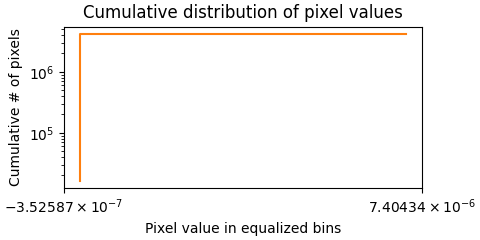

In [25]:
smap

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


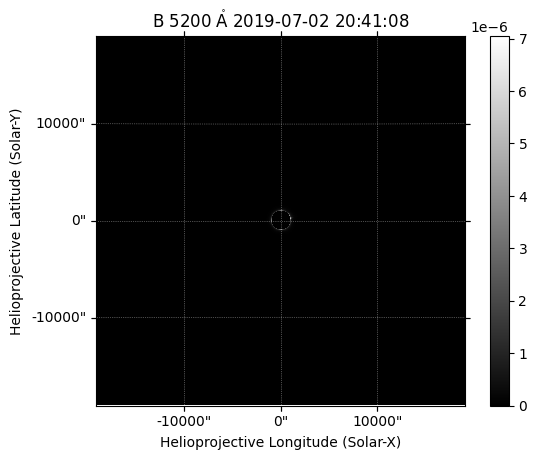

In [23]:
smap.peek()

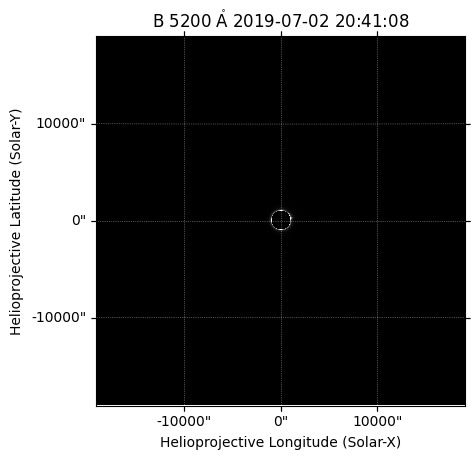

In [26]:
smap.plot(vmax=3e-6)

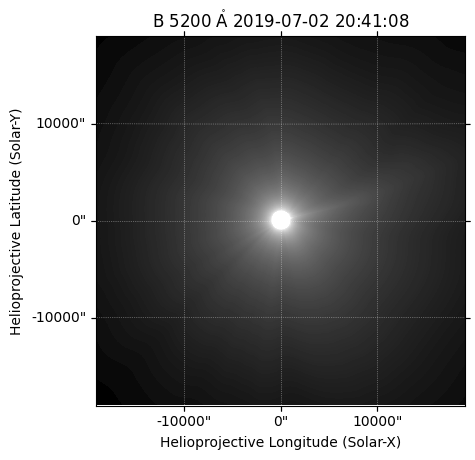

In [27]:
smap.plot(norm="log")

In [29]:
pixel_coords = all_coordinates_from_map(smap)

In [44]:
solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=smap.coordinate_frame)
pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 +
                      (pixel_coords.Ty-solar_center.Ty)**2)
# Note that the inner mask extends just beyond 2 solar radii to mask the
# Fresnel diffraction caused by the occulter edge.
radius = 1.015
mask_inner = pixel_radii < smap.rsun_obs*radius

In [89]:
masked_smap = Map("PSI_data_ex/b_raw/synth_4pi_ec19_super_01_all_raw_b_000.fits",mask=mask_inner)

NameError: name 'mask_inner' is not defined

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
/opt/conda/lib/python3.10/site-packages/sunpy/map/mapbase.py:424: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.set_yscale('log')


<sunpy.map.mapbase.GenericMap object at 0x7efeb277f040>
SunPy Map
---------
Observatory:		 PSI-MAS Forward Model
Instrument:		 Ground
Detector:		 B
Measurement:		 5200.0 Angstrom
Wavelength:		 5200.0 Angstrom
Observation Date:	 2019-07-02 20:41:08
Exposure Time:		 1.0 s
Dimension:		 [2048. 2048.] pix
Coordinate System:	 helioprojective
Scale:			 [18.6983115 18.6983115] arcsec / pix
Reference Pixel:	 [1023.5 1023.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[6.2131757e-14, 6.2393382e-14, 6.2653801e-14, ..., 1.3624941e-13,
        1.3551112e-13, 1.3477168e-13],
       [6.2369570e-14, 6.2629223e-14, 6.2887670e-14, ..., 1.3685992e-13,
        1.3612177e-13, 1.3538237e-13],
       [6.2606645e-14, 6.2864319e-14, 6.3120848e-14, ..., 1.3746876e-13,
        1.3673078e-13, 1.3599151e-13],
       ...,
       [7.8203923e-14, 7.8470054e-14, 7.8736280e-14, ..., 9.8345262e-14,
        9.7840308e-14, 9.7337719e-14],
       [7.7942806e-14, 7.8208056e-14, 7.8473415e-14, ..., 9.7694890e-14,
        9.7191373e-14, 9.6690363e-14],
       [7.7681818e-14, 7.7946194e-14, 7.8210686e-14, ..., 9.7048631e-14,
        9.6546672e-14, 9.6047377e-14]], dtype=float32)
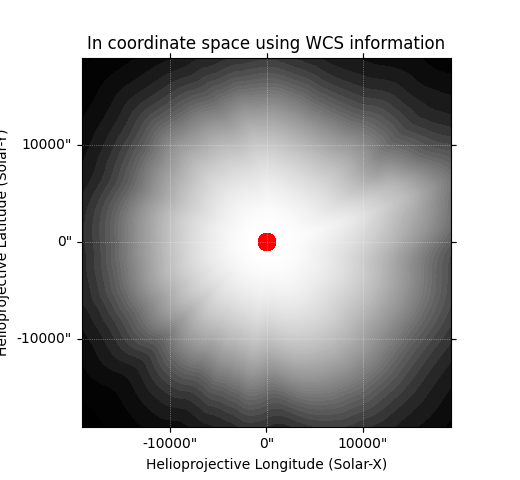
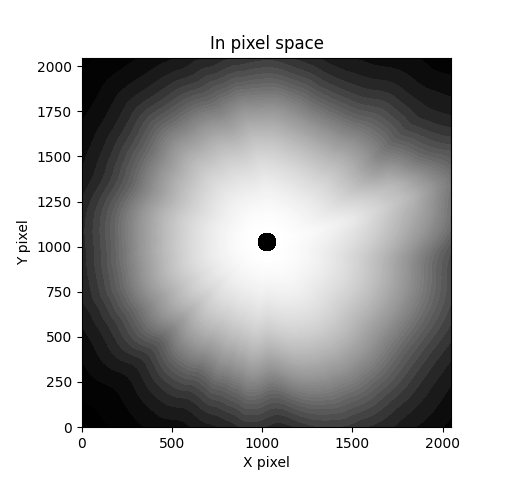
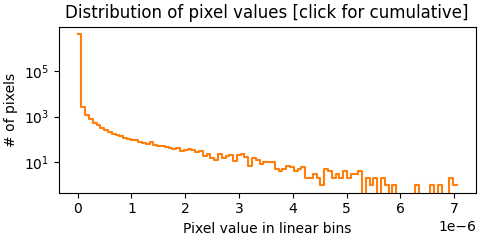
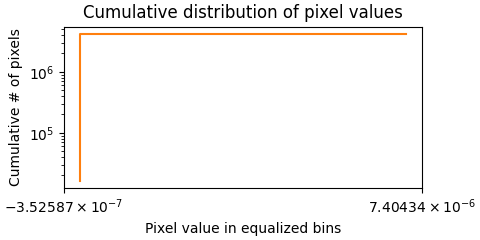

In [46]:
masked_smap

In [114]:
masked_smap.scale

SpatialPair(axis1=<Quantity 18.6983115 arcsec / pix>, axis2=<Quantity 18.6983115 arcsec / pix>)

In [116]:
masked_smap.dsun

<Distance 1.49597871e+11 m>

In [115]:
masked_smap.__dict__.keys()

dict_keys(['_data', '_mask', '_wcs', '_meta', '_unit', '_uncertainty', '_psf', '_nickname', '_default_time', '_default_dsun', '_default_carrington_longitude', '_default_heliographic_latitude', '_default_heliographic_longitude', 'plot_settings', '_meta_hash', 'observer_coordinate', 'wcs'])

In [90]:
occult_colormap = cm.stereocor2.copy()
occult_colormap.set_bad('black')
masked_smap.plot(clip_interval=(2, 98)*u.percent, cmap=occult_colormap)

NameError: name 'masked_smap' is not defined

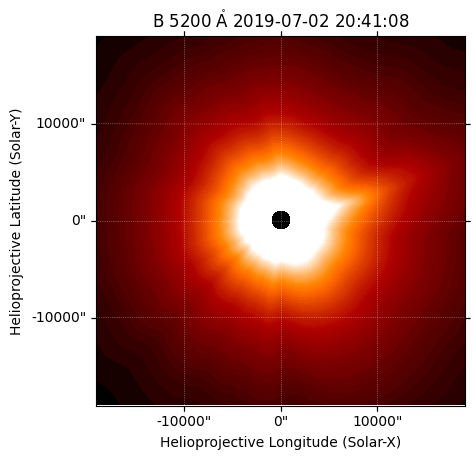

In [57]:
masked_smap.plot(norm="log", cmap=occult_colormap)

In [66]:
data = masked_smap.data
data = data[np.isfinite(data)]
he_norm = ImageNormalize(stretch=HistEqStretch(data))

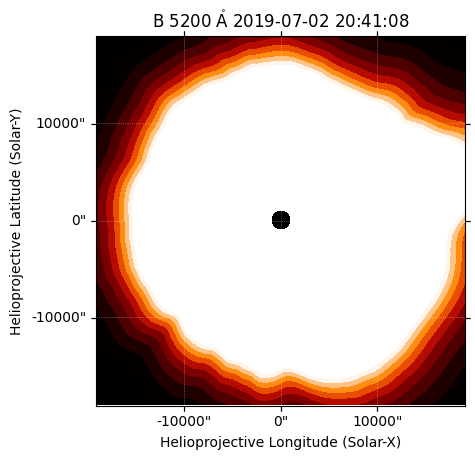

In [67]:
masked_smap.plot(norm=he_norm,cmap=occult_colormap)

In [78]:
data.shape

(4194304,)

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_b_000.fits


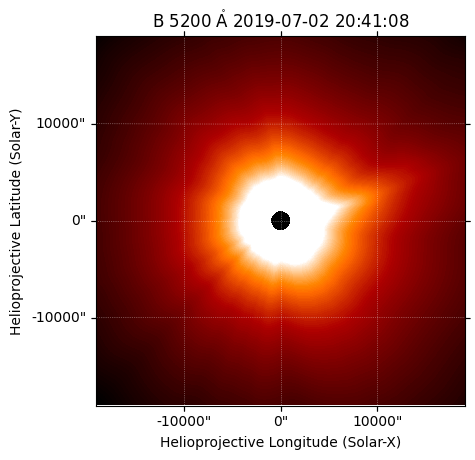

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_b_050.fits


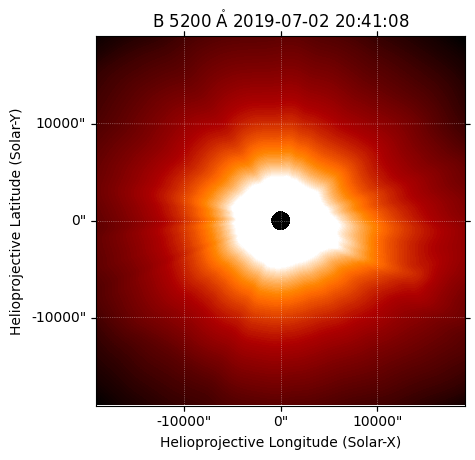

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_b_100.fits


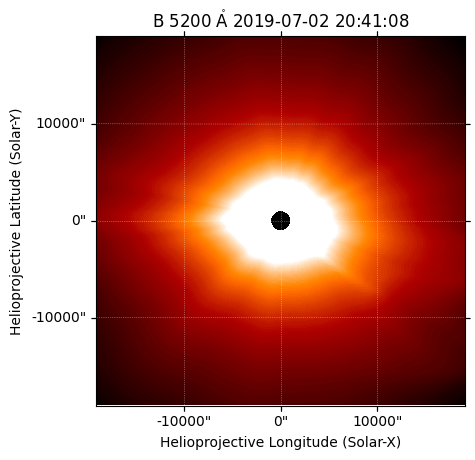

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_b_150.fits


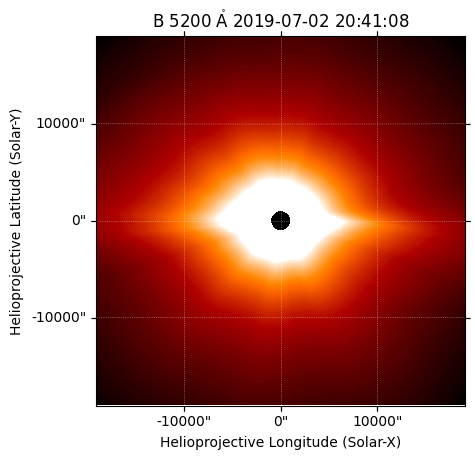

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_b_200.fits


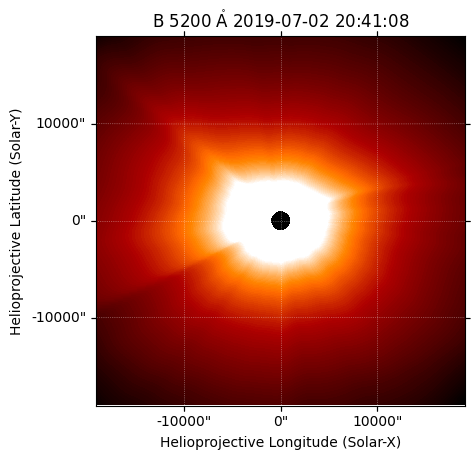

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_b_250.fits


In [109]:
 ## Visualisation of non-polarised observations (same time, different viewpoints?)
import time
dir_b = pathlib.Path("PSI_data_ex/b_raw/")
for i,f in enumerate(np.sort(os.listdir(dir_b))):
    if i%50==0:
        print(dir_/f)
        map_i = Map(dir_b/f)
        pixel_coords = all_coordinates_from_map(map_i)
        solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
        pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 +
                          (pixel_coords.Ty-solar_center.Ty)**2)
        mask_inner = pixel_radii < map_i.rsun_obs*radius 
        masked_i = Map(dir_b/f, mask=mask_inner)
        masked_i.plot(norm="log", cmap=occult_colormap, autoalign=True)
        plt.show()
        time.sleep(1)
    
        
    

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_000.fits


PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_050.fits


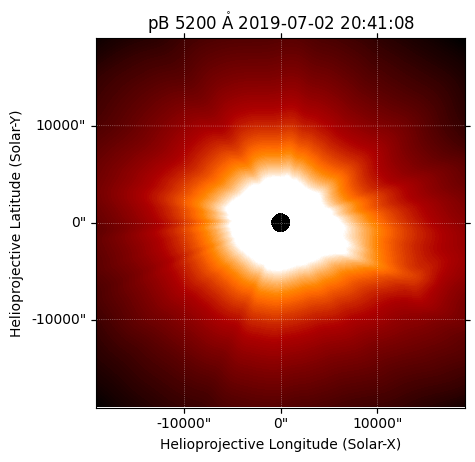

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_100.fits


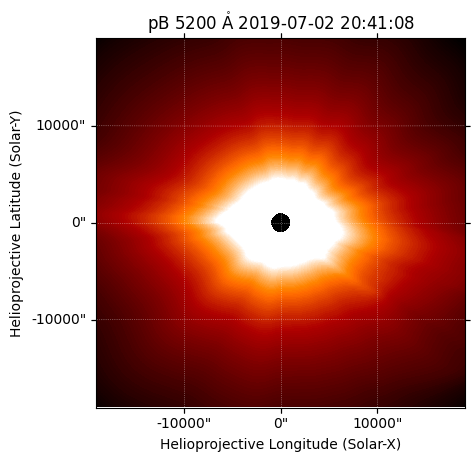

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_150.fits


PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_200.fits


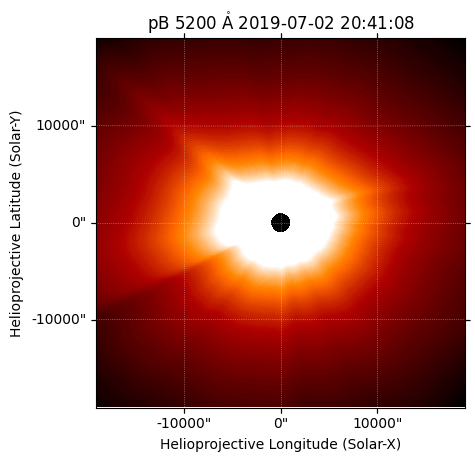

PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_250.fits


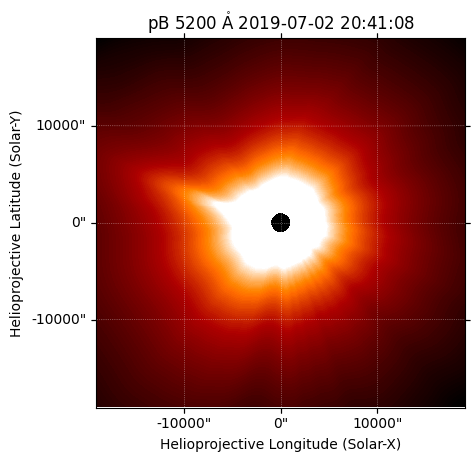

In [110]:
 ## Visualisation of polarised observations (same time, different viewpoints?)
dir_pb = pathlib.Path("PSI_data_ex/pb_raw/")
for i,f in enumerate(np.sort(os.listdir(dir_pb))):
    if i%50==0:
        print(dir_/f)
        map_i = Map(dir_pb/f)
        pixel_coords = all_coordinates_from_map(map_i)
        solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
        pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 +
                          (pixel_coords.Ty-solar_center.Ty)**2)
        mask_inner = pixel_radii < map_i.rsun_obs*radius 
        masked_i = Map(dir_pb/f, mask=mask_inner)
        masked_i.plot(norm="log", cmap=occult_colormap, autoalign=True)
        plt.show()
        time.sleep(1)
    

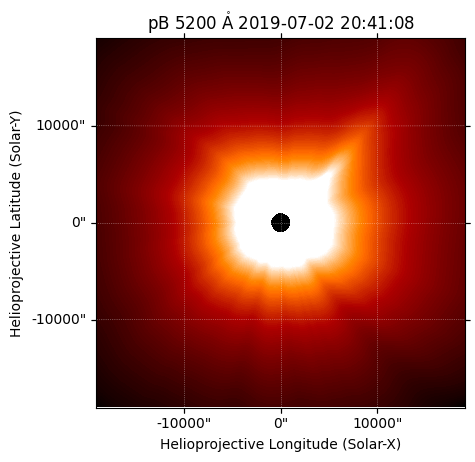

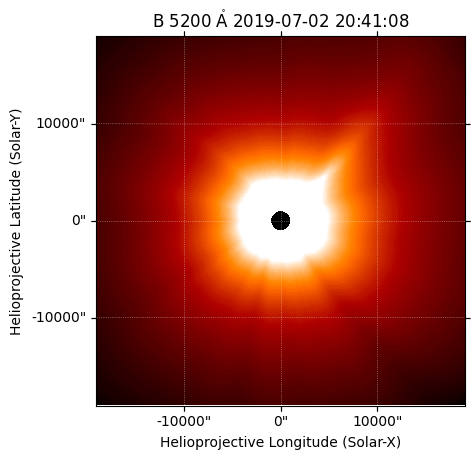

In [113]:
 ## Visualisation of polarised vs. non-polarised observations (same time, same viewpoint)
        index = 5
        f = np.sort(os.listdir(dir_pb))[index]    
        map_i = Map(dir_pb/f)
        pixel_coords = all_coordinates_from_map(map_i)
        solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
        pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 +
                          (pixel_coords.Ty-solar_center.Ty)**2)
        mask_inner = pixel_radii < map_i.rsun_obs*radius 
        masked_i = Map(dir_pb/f, mask=mask_inner)
        masked_i.plot(norm="log", cmap=occult_colormap, autoalign=True)
        plt.show()
        time.sleep(1)
        
        f = np.sort(os.listdir(dir_b))[index]    
        map_i = Map(dir_b/f)
        pixel_coords = all_coordinates_from_map(map_i)
        solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
        pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 +
                          (pixel_coords.Ty-solar_center.Ty)**2)
        mask_inner = pixel_radii < map_i.rsun_obs*radius 
        masked_i = Map(dir_b/f, mask=mask_inner)
        masked_i.plot(norm="log", cmap=occult_colormap, autoalign=True)
        plt.show()

# HAO 

In [120]:
#!gsutil -m cp -r gs://fdl_space_weather_data/HAO_data .

**Colour maps**:
* stereocor2
* sswidlsoholasco3
* soholasco3
* soholasco2

In [4]:
occult_colormap = cm.soholasco2.copy()
occult_colormap.set_bad('green')#black')

#occult_colormap = "reds"

In [5]:
def _plot_PSI(fname, occ_rad=1.015*u.R_sun, verbose=False):
    """
    PSI
    Lower corona --> 20 solar radii
    Static model
    No CMEs included
    """
    if verbose:
        print(getheader(fname))
    
    map_i = Map(fname)
    
    pixel_coords = all_coordinates_from_map(map_i)
    solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
    
    if verbose:
        print(map_i.coordinate_frame)
    
    pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 + \
                      (pixel_coords.Ty-solar_center.Ty)**2)
    
    mask_inner = pixel_radii < map_i.rsun_obs*occ_rad.to(u.R_sun).value
 
    masked_i = Map(map_i.data, map_i.meta, mask=mask_inner)
    masked_i.plot(norm="log", cmap=occult_colormap, autoalign=True)
    map_i.draw_limb(color="cyan")
    plt.show()
    #time.sleep(1)
    
    if verbose:
        d = masked_i.data
        d[masked_i.mask] = np.nan
        print("Scaling:", np.nanmin(np.log(d)), np.nanmax(np.log(d)))
    
    return masked_i

In [86]:
def _plot_HAO(fname, occ_rad=0.1*u.au, verbose=False):
    """
    HAO 
    20 solar radii (0.1 AU) -->
    Dynamic model
    CMEs included
    """
    # assumes dsun is 1AU
    data, header = getdata(fname), getheader(fname)
    
    if verbose:
        print(header)
    
    # initialise 
    header['cunit1'] = 'arcsec' #"deg" #'arcsec' #'rad' 
    header['cunit2'] = 'arcsec' #"deg" #'arcsec' #'rad' 
    header['HGLN_OBS'] = np.rad2deg(header["OBS_LON"]) # rad to deg
    header['HGLT_OBS'] = np.rad2deg(header["OBS_LAT"])
    header['DSUN_OBS'] = (header["OBS_R0"]*u.Rsun).to("m").value # solar radii to m

    header["CTYPE1"] = "HPLN-TAN"
    header["CTYPE2"] = "HPLT-TAN"

    header["CDELT1"] = np.rad2deg(header["CDELT1"])*3600 #*((3600 * 180)/np.pi) # rad -- arcsec
    header["CDELT2"] = np.rad2deg(header["CDELT2"])*3600 #*((3600 * 180)/np.pi) # rad -- arcsec

    # manual set of centre value to 0
    header['CRVAL1'] = 0 #np.rad2deg(header["CRVAL1"])*3600 # rad -- arcsec
    header['CRVAL2'] = 0 #np.rad2deg(header["CRVAL2"])*3600

    header["CRPIX1"] = header["NAXIS1"]*0.5 + 0.5
    header["CRPIX2"] = header["NAXIS2"]*0.5 + 0.5

    map_i = Map(data, header)
    
    pixel_coords = all_coordinates_from_map(map_i)
    solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
    
    if verbose:
        print(map_i.coordinate_frame)
    
    pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 + \
                      (pixel_coords.Ty-solar_center.Ty)**2)
    
    mask_inner = pixel_radii < map_i.rsun_obs*occ_rad.to(u.R_sun).value
 
    masked_i = Map(map_i.data, map_i.meta, mask=mask_inner)
    masked_i.plot(norm="log", cmap=occult_colormap, autoalign=True)  
    map_i.draw_limb(color="cyan")
    plt.show()
    #time.sleep(1)
    
    if verbose:
        d = masked_i.data
        d[masked_i.mask] = np.nan
        print("Scaling:", np.nanmin(np.log(d)), np.nanmax(np.log(d)))

    return masked_i

In [50]:
min_element, max_element = [],[]
def _calculate_scaling_HAO(fname, occ_rad=0.1*u.au, verbose=False):
    """
    HAO 
    20 solar radii (0.1 AU) -->
    Dynamic model
    CMEs included
    """
    # assumes dsun is 1AU
    data, header = getdata(fname), getheader(fname)
    
    
    
    # initialise 
    header['cunit1'] = 'arcsec' #"deg" #'arcsec' #'rad' 
    header['cunit2'] = 'arcsec' #"deg" #'arcsec' #'rad' 
    header['HGLN_OBS'] = np.rad2deg(header["OBS_LON"]) # rad to deg
    header['HGLT_OBS'] = np.clip(np.rad2deg(header["OBS_LAT"]) - 90,-90,90) # Latitude is between -90 to 90
    header['DSUN_OBS'] = (header["OBS_R0"]*u.Rsun).to("m").value # solar radii to m

    header["CTYPE1"] = "HPLN-TAN"
    header["CTYPE2"] = "HPLT-TAN"

    header["CDELT1"] = np.rad2deg(header["CDELT1"])*3600 #*((3600 * 180)/np.pi) # rad -- arcsec
    header["CDELT2"] = np.rad2deg(header["CDELT2"])*3600 #*((3600 * 180)/np.pi) # rad -- arcsec

    # manual set of centre value to 0
    header['CRVAL1'] = 0 #np.rad2deg(header["CRVAL1"])*3600 # rad -- arcsec
    header['CRVAL2'] = 0 #np.rad2deg(header["CRVAL2"])*3600

    header["CRPIX1"] = header["NAXIS1"]*0.5 + 0.5
    header["CRPIX2"] = header["NAXIS2"]*0.5 + 0.5
    if verbose:
        print(header)

    map_i = Map(data, header)
    
    pixel_coords = all_coordinates_from_map(map_i)
    solar_center = SkyCoord(0*u.deg, 0*u.deg, frame=map_i.coordinate_frame)
    
    if verbose:
        print(map_i.coordinate_frame)
    
    pixel_radii = np.sqrt((pixel_coords.Tx-solar_center.Tx)**2 + \
                      (pixel_coords.Ty-solar_center.Ty)**2)
    
    mask_inner = pixel_radii < map_i.rsun_obs*occ_rad.to(u.R_sun).value
 
    masked_i = Map(map_i.data, map_i.meta, mask=mask_inner)
    
    #time.sleep(1)
    d = masked_i.data
    d[masked_i.mask] = np.nan
    if verbose:
        print("Scaling:", np.nanmin(np.log(d)), np.nanmax(np.log(d)))
    min_element.append(np.nanmin(d))
    max_element.append(np.nanmax(d))
    
    return masked_i, np.nanmin(np.log(d)), np.nanmax(np.log(d))

SIMPLE  =                    T / Written by IDL:  Wed Jul  5 17:25:26 2023      BITPIX  =                  -32 / Real*4 (floating point)                        NAXIS   =                    2 /                                                NAXIS1  =                 2048 /                                                NAXIS2  =                 2048 /                                                DATE_OBS= '2019-07-02T20:41:08.8Z' /                                            T_REC   = '2019-07-02T20:41:08.8Z' /                                            T_OBS   = '2019-07-02T20:41:08.8Z' /                                            OBSRVTRY= 'PSI-MAS Forward Model' /                                             INSTRUME= 'Ground  '           /                                                TELESCOP= 'Ground  '           /                                                DETECTOR= 'pB      '           /                                                IMG_TYPE= 'model   '           /        

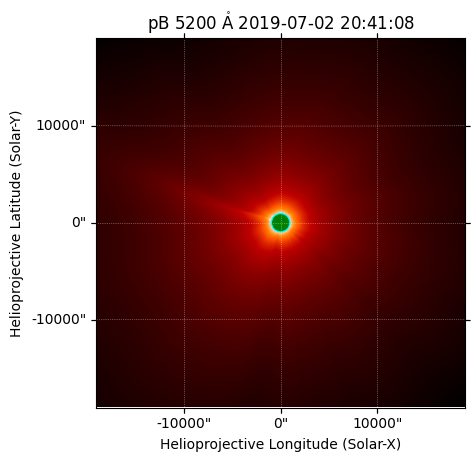

Scaling: -30.481628 -13.419997


In [7]:
# PSI eg
fname = "PSI_data_ex/pb_raw/synth_4pi_ec19_super_01_all_raw_pb_250.fits"
map_psi = _plot_PSI(fname, verbose=True)

In [87]:
# HAO eg
fname = "HAO_data/data_fits/dcmer_0000_bang_0000_pB/stepnum_005.fits"
map_hao = _plot_HAO(fname, verbose=True)

SIMPLE  =                    T /  Written by IDL:  Sun Jul  2 16:29:43 2023     BITPIX  =                  -32 / Real*4 (floating point)                        NAXIS   =                    2 /                                                NAXIS1  =                 1024 /                                                NAXIS2  =                 1024 /                                                EXTEND  =                    T / Extensions may be present                      CTYPE1  = 'x       '           / East->West [radians in the celestial sphere]   CTYPE2  = 'y       '           / South->North [radians in the celestial sphere] CRVAL1  =      -0.785398185253 / reference pixel value [rad]                    CRVAL2  =      -0.785398185253 / reference pixel value [rad]                    CRPIX1  =                    0 / reference pixel location [pix]                 CRPIX2  =                    0 / reference pixel location [pix]                 CDELT1  =     0.00153548032308 / [rad/pi

NameError: name 'occult_colormap' is not defined

In [85]:
# HAO eg
fname = "HAO_data/data_fits/dcmer_0000_bang_0000_tB/stepnum_005.fits"
map_hao = _plot_HAO(fname, verbose=True)

NameError: name '_plot_HAO' is not defined

In [13]:
map_hao.rsun_obs

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


<Angle 961.1180843 arcsec>

SIMPLE  =                    T /  Written by IDL:  Sun Jul  2 16:29:43 2023     BITPIX  =                  -32 /  Real*8 (double precision)                     NAXIS   =                    2 /                                                NAXIS1  =                 1024 /                                                NAXIS2  =                 1024 /                                                EXTEND  =                    T / Extensions may be present                      CTYPE1  = 'x       '           / East->West [radians in the celestial sphere]   CTYPE2  = 'y       '           / South->North [radians in the celestial sphere] CRVAL1  =      -0.785398185253 / reference pixel value [rad]                    CRVAL2  =      -0.785398185253 / reference pixel value [rad]                    CRPIX1  =                    0 / reference pixel location [pix]                 CRPIX2  =                    0 / reference pixel location [pix]                 CDELT1  =     0.00153548032308 / [rad/pi

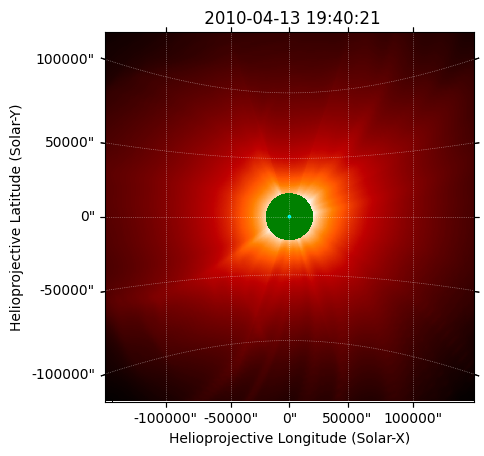

Scaling: -17.80656 -9.797268
SIMPLE  =                    T /  Written by IDL:  Sun Jul  2 16:29:43 2023     BITPIX  =                  -32 / Real*4 (floating point)                        NAXIS   =                    2 /                                                NAXIS1  =                 1024 /                                                NAXIS2  =                 1024 /                                                EXTEND  =                    T / Extensions may be present                      CTYPE1  = 'x       '           / East->West [radians in the celestial sphere]   CTYPE2  = 'y       '           / South->North [radians in the celestial sphere] CRVAL1  =      -0.785398185253 / reference pixel value [rad]                    CRVAL2  =      -0.785398185253 / reference pixel value [rad]                    CRPIX1  =                    0 / reference pixel location [pix]                 CRPIX2  =                    0 / reference pixel location [pix]                 CDELT1  =  

Scaling: -17.969841 -10.330423


In [15]:
fname1 = "HAO_data/data_fits/dcmer_0000_bang_0000_tB/stepnum_005.fits"
fname2 = "HAO_data/data_fits/dcmer_0000_bang_0000_pB/stepnum_005.fits"
map_hao1 = _plot_HAO(fname1, verbose=True)
map_hao2 = _plot_HAO(fname2, verbose=True)

/opt/conda/lib/python3.10/site-packages/sunpy/map/mapbase.py:424: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.set_yscale('log')


<sunpy.map.mapbase.GenericMap object at 0x7f9408d33c10>
SunPy Map
---------
Observatory:		 
Instrument:		 
Detector:		 
Measurement:		 Unknown
Wavelength:		 Unknown
Observation Date:	 2010-04-13 19:40:21
Exposure Time:		 Unknown
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [316.71555134 316.71555134] arcsec / pix
Reference Pixel:	 [511.5 511.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[1.8480286e-08, 1.8588610e-08, 1.8700705e-08, ..., 1.9161583e-08,
        1.9101906e-08, 1.9057245e-08],
       [1.8610628e-08, 1.8723201e-08, 1.8837971e-08, ..., 1.9246249e-08,
        1.9184156e-08, 1.9137117e-08],
       [1.8740065e-08, 1.8855348e-08, 1.8971912e-08, ..., 1.9330983e-08,
        1.9265835e-08, 1.9215685e-08],
       ...,
       [2.4494208e-08, 2.4533694e-08, 2.4585674e-08, ..., 3.2291830e-08,
        3.2284298e-08, 3.2280159e-08],
       [2.4452204e-08, 2.4478311e-08, 2.4517485e-08, ..., 3.2169709e-08,
        3.2163719e-08, 3.2162763e-08],
       [2.4422160e-08, 2.4438274e-08, 2.4463587e-08, ..., 3.2050949e-08,
        3.2048391e-08, 3.2050988e-08]], dtype=float32)
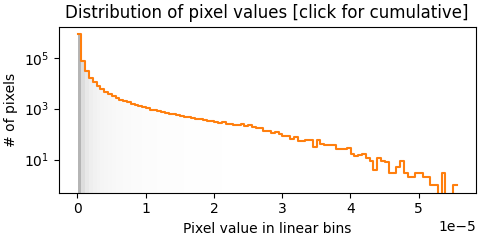
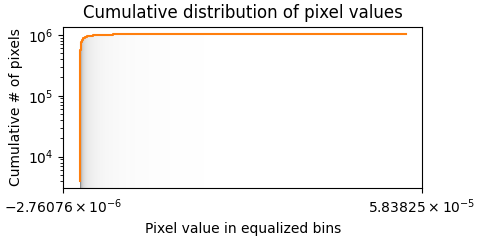

In [16]:
map_hao1

/opt/conda/lib/python3.10/site-packages/sunpy/map/mapbase.py:424: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.set_yscale('log')


<sunpy.map.mapbase.GenericMap object at 0x7f9408dab910>
SunPy Map
---------
Observatory:		 
Instrument:		 
Detector:		 
Measurement:		 Unknown
Wavelength:		 Unknown
Observation Date:	 2010-04-13 19:40:21
Exposure Time:		 Unknown
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [316.71555134 316.71555134] arcsec / pix
Reference Pixel:	 [511.5 511.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[1.5696305e-08, 1.5780431e-08, 1.5867947e-08, ..., 1.6704643e-08,
        1.6658282e-08, 1.6623346e-08],
       [1.5798793e-08, 1.5886650e-08, 1.5976616e-08, ..., 1.6770686e-08,
        1.6722455e-08, 1.6685663e-08],
       [1.5901117e-08, 1.5991491e-08, 1.6083233e-08, ..., 1.6836790e-08,
        1.6786165e-08, 1.6746949e-08],
       ...,
       [2.2046063e-08, 2.2075405e-08, 2.2116980e-08, ..., 2.8351645e-08,
        2.8347369e-08, 2.8345475e-08],
       [2.2015520e-08, 2.2031884e-08, 2.2060938e-08, ..., 2.8252344e-08,
        2.8249223e-08, 2.8249810e-08],
       [2.1996719e-08, 2.2003377e-08, 2.2018904e-08, ..., 2.8155656e-08,
        2.8155201e-08, 2.8158558e-08]], dtype=float32)
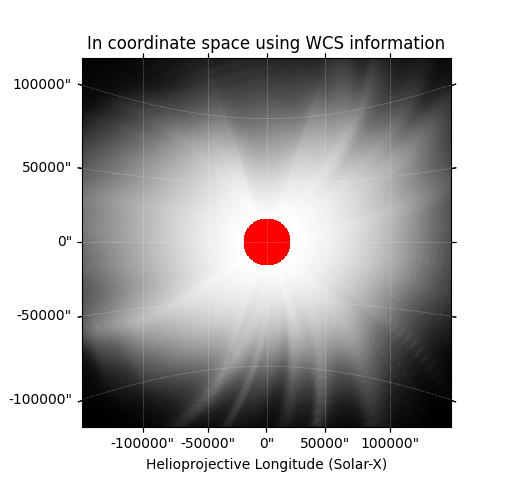
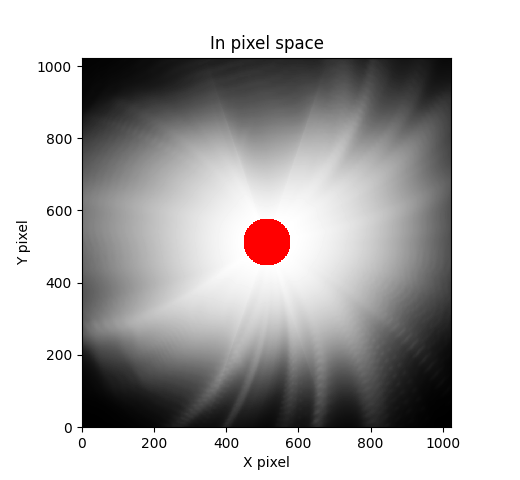
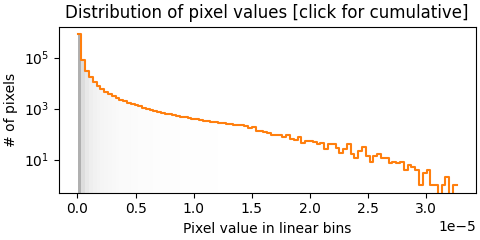
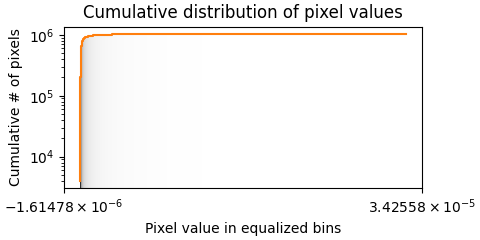

In [17]:
map_hao2

In [50]:
# we want to get the near and far

map_hao.scale[0] * 1024 * u.pix / map_hao.rsun_obs  # solar radii in frame

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


<Quantity 337.43691838>

In [84]:
map_hao

NameError: name 'map_hao' is not defined

# Global Calculation of $v_{min}, v_{max}$

In [56]:
from glob import glob
import os
import logging


In [52]:
base_filename = os.path.join("HAO_data","data_fits")

In [53]:
filenames = glob(base_filename+"/**/*.fits")


In [17]:
'''
    Split folders into training, test, val 
        - Check with dataloader
            -- Design choice for evaluation pipeline: Split by folder vs split by timestep? 
        
    Load data from training - figure out what the min, max of the log data is
    Iterate through full training dataset, calculate global training min, max
    
    
    Problem: In the dataloader, batches are shuffled - there is no way to precompute the correct configuration. 
    Instead, pick the global values for vmin, vmax
'''


'\n    Split folders into training, test, val \n        - Check with dataloader\n            -- Design choice for evaluation pipeline: Split by folder vs split by timestep? \n        \n    Load data from training - figure out what the min, max of the log data is\n    Iterate through full training dataset, calculate global training min, max\n    \n    \n    Problem: In the dataloader, batches are shuffled - there is no way to precompute the correct configuration. \n    Instead, pick the global values for vmin, vmax\n'

In [73]:
v_max_global = -100
v_min_global = np.inf

for fi, fname in enumerate(filenames):
    try:
        print("Filename: {} - File {} out of {}".format(fname, fi, len(filenames)))
        _, v_max, v_min = _calculate_scaling_HAO(fname, verbose = False)
        if v_min_global > v_min:
            v_min_global = v_min
        if v_max_global < v_max:
            v_max_global = v_max
    except Exception as e:
        print("File {} failed to open - Error: {}".format(fname, e))


Filename: HAO_data/data_fits/dcmer_020W_bang_030E_pB/stepnum_071.fits - File 0 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_020W_bang_030E_pB/stepnum_045.fits - File 1 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_020W_bang_030E_pB/stepnum_074.fits - File 2 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radi

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_100W_bang_0000_tB/stepnum_079.fits - File 262 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_100W_bang_0000_tB/stepnum_077.fits - File 263 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_020W_bang

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_080W_bang_010E_pB/stepnum_076.fits - File 5009 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_080W_bang_010E_pB/stepnum_075.fits - File 5010 out of 5322
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Filename: HAO_data/data_fits/dcmer_080W_ba

In [83]:
print("Max from calc: {} - Min from calc: {}".format(v_max_global, v_min_global))
print("Max from array: {} - Min from Array: {}".format(np.log(np.max(max_element)), np.log(np.min(min_element))))

Max from calc: -17.52203369140625 - Min from calc: -10.573690414428711
Max from array: -9.742393493652344 - Min from Array: -19.33344268798828


In [78]:
np.log(np.min(min_element))

-19.333443

In [79]:
np.log(np.max(max_element))

-9.7423935

# Observational data

In [4]:
obs_dir = '/mnt/ground-data/data_fits_stereo_2014_02/'
fname = os.path.join(obs_dir, 'stereo_a','20140219_160815_1B4c2A.fts')

In [6]:
smap = Map(fname)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
/opt/conda/lib/python3.10/site-packages/sunpy/map/mapbase.py:424: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.set_yscale('log')


<sunpy.map.sources.stereo.CORMap object at 0x7f7eec082a10>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR2
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2014-02-19 16:08:15
Exposure Time:		 -1.0 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [29.39999962 29.39999962] arcsec / pix
Reference Pixel:	 [510.25 509.65] pix
Reference Coord:	 [ 71.62748718 -49.91906738] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
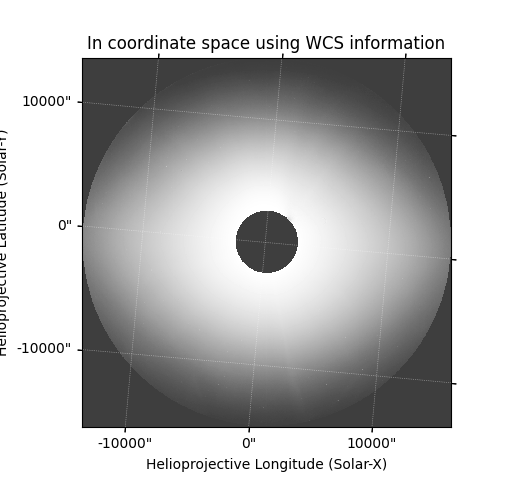
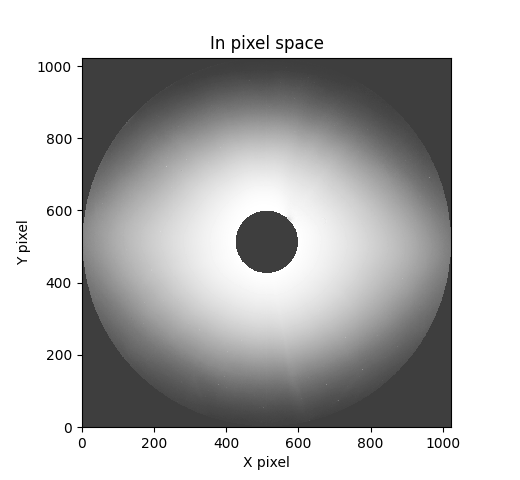
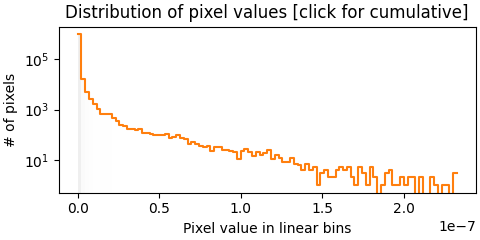
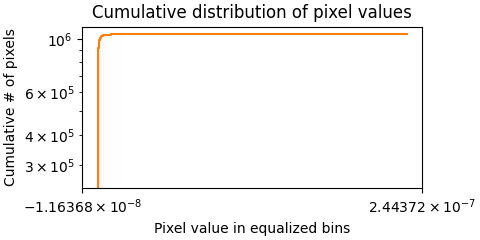

In [7]:
smap

In [9]:
pixel_coords = all_coordinates_from_map(smap)

In [10]:
pixel_coords

<SkyCoord (Helioprojective: obstime=2014-02-19T16:08:15.008, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2014-02-19T16:08:15.008, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (152.30090954, 5.45647059, 1.43059013e+11)>): (Tx, Ty) in arcsec
    [[(-13509.16254101, -16247.3183477 ),
      (-13480.00640201, -16244.8596739 ),
      (-13450.84972087, -16242.4006265 ), ...,
      ( 16334.86159111, -13567.91395462),
      ( 16363.9620446 , -13565.15131668),
      ( 16393.06184798, -13562.38846636)],
     [(-13511.78188213, -16218.26572697),
      (-13482.62579291, -16215.80675928),
      (-13453.46916143, -16213.34741856), ...,
      ( 16332.24616529, -13538.8613529 ),
      ( 16361.34667614, -13536.09900946),
      ( 16390.446537  , -13533.33645421)],
     [(-13514.40121869, -16189.21250945),
      (-13485.24517924, -16186.75324785),
      (-13456.08859744, -16184.29361378), ...,
      ( 16329.63073441, -13509.80815483),
      ( 16358.73130262, -13507

In [14]:
data = smap.data
data[data < 0]

array([], dtype=float32)

In [16]:
smap.carrington_latitude.value

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


5.456470592599999

In [20]:
header = getheader(fname)

In [21]:
header

SIMPLE  =                    T / Written by IDL:  Mon Aug  7 10:01:07 2023      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2 /                                                
NAXIS1  =                 1024 /                                                
NAXIS2  =                 1024 /                                                
DATE-OBS= '2014-02-19T16:08:15.008' /                                           
TIME_OBS= '        '           /                                                
FILEORIG= 'E21903GL.411'       /                                                
SEB_PROG= 'NORMAL  '           /                                                
SYNC    =                    F /                                                
SPWX    =                    T /                                                
EXPCMD  =              2.00090 /Average of input images                         
EXPTIME =             -1.000

In [22]:
header['OBSRVTRY']

'STEREO_A'

In [28]:
print("Scaling:", np.nanmin(np.log(data[data > 0])), np.nanmax(np.log(data)))

Scaling: -23.63556 -15.273365


/var/tmp/ipykernel_133362/1455324909.py:1: RuntimeWarning: divide by zero encountered in log
  print("Scaling:", np.nanmin(np.log(data[data > 0])), np.nanmax(np.log(data)))


In [30]:
fname_pB = os.path.join(obs_dir, 'stereo_a','20140219_160815_1P4c2A.fts')

In [31]:
smap_pB = Map(fname_pB)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
/opt/conda/lib/python3.10/site-packages/sunpy/map/mapbase.py:424: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.set_yscale('log')


<sunpy.map.sources.stereo.CORMap object at 0x7f7eead155d0>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 COR2
Measurement:		 white-light
Wavelength:		 0.0
Observation Date:	 2014-02-19 16:08:15
Exposure Time:		 -1.0 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [29.39999962 29.39999962] arcsec / pix
Reference Pixel:	 [510.25 509.65] pix
Reference Coord:	 [ 71.62748718 -49.91906738] arcsec                   
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
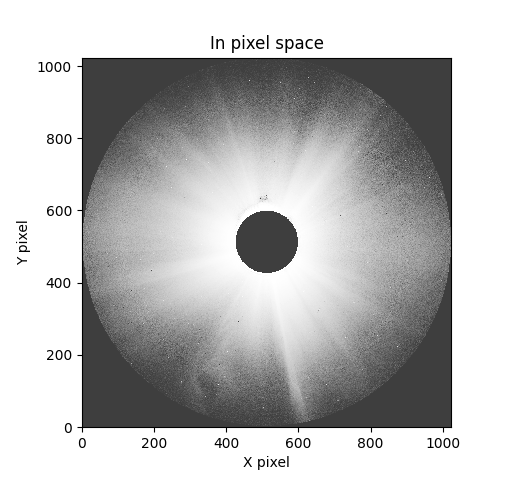
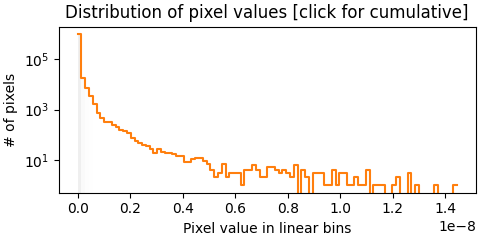
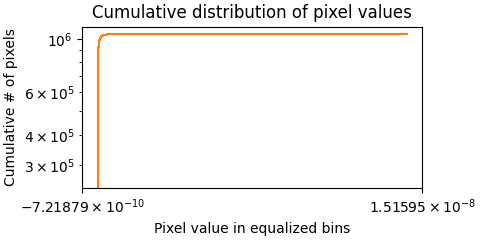

In [32]:
smap_pB

In [34]:
data_pB = smap_pB.data

In [35]:
print("Scaling pB:", np.nanmin(np.log(data_pB[data_pB > 0])), np.nanmax(np.log(data_pB)))

Scaling pB: -29.108622 -18.05343


/var/tmp/ipykernel_133362/4147871838.py:1: RuntimeWarning: divide by zero encountered in log
  print("Scaling pB:", np.nanmin(np.log(data_pB[data_pB > 0])), np.nanmax(np.log(data_pB)))
